In [1]:
#Import
import os

import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torchvision
from torchvision import datasets, transforms
import random
from torch.nn import Parameter
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
def colorMapping(x, name_map="magma"):
    cm = plt.get_cmap(name_map)

    x_map1 = cm(x[ 0, :, :,].detach().numpy())
    
    x_map2 = torch.Tensor(x_map1[ :, :, :3]).to(torch.float).transpose(-2, -1).transpose(0, 1)

    return x_map2


In [3]:
def gauss_noise_tensor(img):
    assert isinstance(img, torch.Tensor)
    dtype = img.dtype
    if not img.is_floating_point():
        img = img.to(torch.float32)
    
    sigma = (0.1**1)
    
    out = img + sigma * torch.randn_like(img)
    
    if out.dtype != dtype:
        out = out.to(dtype)
        
    return out

In [4]:
transform_normal = transforms.Compose([transforms.Resize(224),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                colorMapping
                               ])

transform_gauss = transforms.Compose([transforms.Resize(224),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                gauss_noise_tensor,
                                colorMapping
                               ])

transform_rotate = transforms.Compose([transforms.Resize(224),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.RandomRotation(40),
                                colorMapping
                               ])

transform_invert = transforms.Compose([transforms.Resize(224),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.RandomVerticalFlip(),
                                colorMapping
                               ])

transform_gauss_rotate = transforms.Compose([transforms.Resize(224),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                gauss_noise_tensor,
                                transforms.RandomRotation(40),
                                colorMapping
                               ])

In [5]:
dataset_nonDemented = datasets.ImageFolder("../Alzheimer/Dataset2/NonDemented/")
dataset_nonDemented_normal = dataset_nonDemented
dataset_nonDemented_normal.transform = transform_normal

dataset_nonDemented = datasets.ImageFolder("../Alzheimer/Dataset2/NonDemented/")
dataset_nonDemented_gauss = dataset_nonDemented
dataset_nonDemented_gauss.transform = transform_gauss

dataset_nonDemented = datasets.ImageFolder("../Alzheimer/Dataset2/NonDemented/")
dataset_nonDemented_rotate = dataset_nonDemented
dataset_nonDemented_rotate.transform = transform_rotate

dataset_nonDemented = datasets.ImageFolder("../Alzheimer/Dataset2/NonDemented/")
dataset_nonDemented_invert = dataset_nonDemented
dataset_nonDemented_invert.transform = transform_invert

dataset_nonDemented = datasets.ImageFolder("../Alzheimer/Dataset2/NonDemented/")
dataset_nonDemented_gauss_rotate = dataset_nonDemented
dataset_nonDemented_gauss_rotate.transform = transform_gauss_rotate

In [6]:
def rgb2gray(rgb):
    rgb = rgb.transpose(0, 1).transpose(1, 2)
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

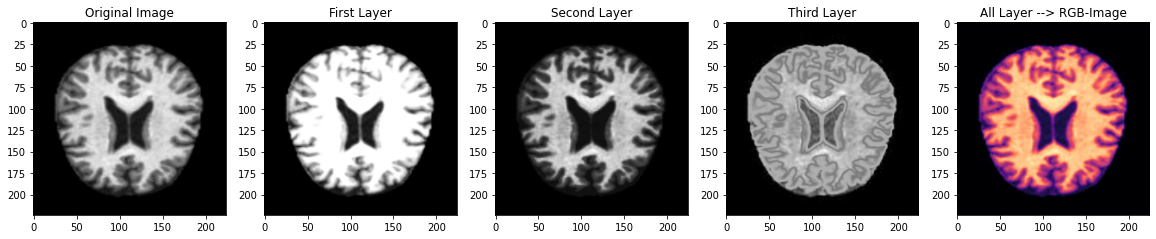

In [7]:
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
plt.gray()

scans = dataset_nonDemented_normal[0][0]
ax[0].title.set_text('Original Image')
ax[0].imshow(rgb2gray(scans))

ax[1].title.set_text('First Layer')
ax[1].imshow(scans[0])

ax[2].title.set_text('Second Layer')
ax[2].imshow(scans[1])

ax[3].title.set_text('Third Layer')
ax[3].imshow(scans[2])

ax[4].title.set_text('All Layer --> RGB-Image')
ax[4].imshow(scans.transpose(0, 1).transpose(1, 2)[:, :, :3])

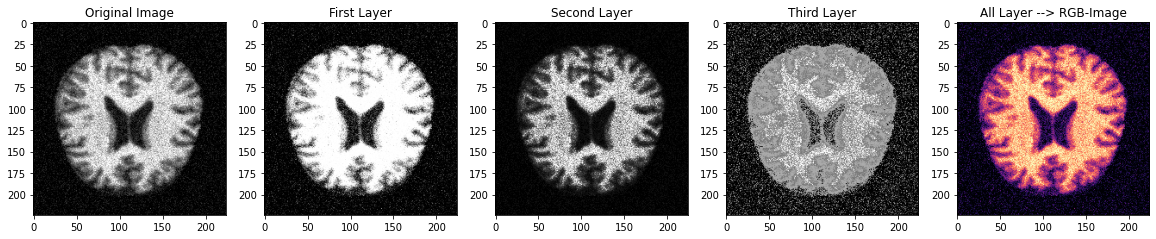

In [8]:
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
plt.gray()

scans = dataset_nonDemented_gauss[0][0]
ax[0].title.set_text('Original Image')
ax[0].imshow(rgb2gray(scans))

ax[1].title.set_text('First Layer')
ax[1].imshow(scans[0])

ax[2].title.set_text('Second Layer')
ax[2].imshow(scans[1])

ax[3].title.set_text('Third Layer')
ax[3].imshow(scans[2])

ax[4].title.set_text('All Layer --> RGB-Image')
ax[4].imshow(scans.transpose(0, 1).transpose(1, 2)[:, :, :3])

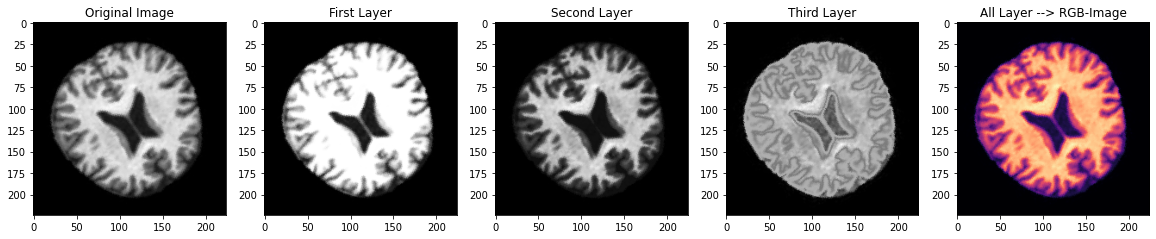

In [9]:
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
plt.gray()

scans = dataset_nonDemented_rotate[0][0]
ax[0].title.set_text('Original Image')
ax[0].imshow(rgb2gray(scans))

ax[1].title.set_text('First Layer')
ax[1].imshow(scans[0])

ax[2].title.set_text('Second Layer')
ax[2].imshow(scans[1])

ax[3].title.set_text('Third Layer')
ax[3].imshow(scans[2])

ax[4].title.set_text('All Layer --> RGB-Image')
ax[4].imshow(scans.transpose(0, 1).transpose(1, 2)[:, :, :3])

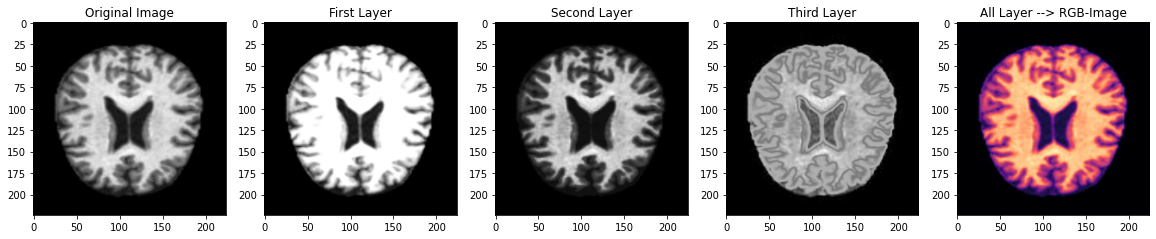

In [10]:
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
plt.gray()

scans = dataset_nonDemented_invert[0][0]
ax[0].title.set_text('Original Image')
ax[0].imshow(rgb2gray(scans))

ax[1].title.set_text('First Layer')
ax[1].imshow(scans[0])

ax[2].title.set_text('Second Layer')
ax[2].imshow(scans[1])

ax[3].title.set_text('Third Layer')
ax[3].imshow(scans[2])

ax[4].title.set_text('All Layer --> RGB-Image')
ax[4].imshow(scans.transpose(0, 1).transpose(1, 2)[:, :, :3])

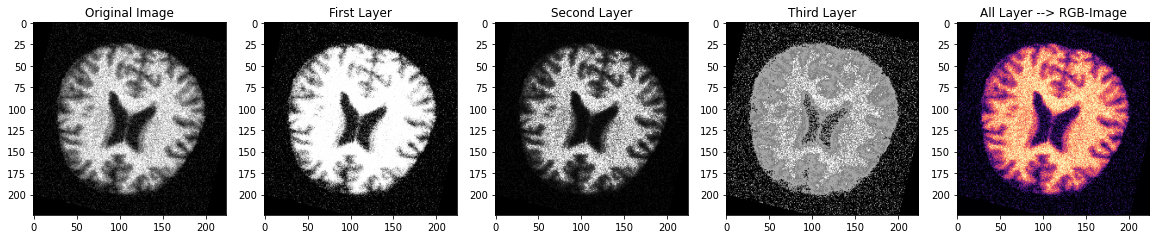

In [11]:
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
plt.gray()

scans = dataset_nonDemented_gauss_rotate[0][0]
ax[0].title.set_text('Original Image')
ax[0].imshow(rgb2gray(scans))

ax[1].title.set_text('First Layer')
ax[1].imshow(scans[0])

ax[2].title.set_text('Second Layer')
ax[2].imshow(scans[1])

ax[3].title.set_text('Third Layer')
ax[3].imshow(scans[2])

ax[4].title.set_text('All Layer --> RGB-Image')
ax[4].imshow(scans.transpose(0, 1).transpose(1, 2)[:, :, :3])